In [23]:
from sympy import symbols, Function, cos, sin, diff
from sympy.utilities import lambdify
from sympy.vector import CoordSys3D, is_solenoidal, curl, Del
from sympy.functions.elementary.hyperbolic import cosh, sinh

# define symbols and functions
V = Function('V')
Fu = Function('Fu')
Fv = Function('Fv')
C = Function('C')

V_syms = symbols('V, V_u, V_v, V_uu, V_uv, V_vv')
Fu_syms = symbols('Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv')
Fv_syms = symbols('Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv')
C_syms = symbols('C, C_u, C_v, C_uu, C_uv, C_vv')

u, v, a, j, n= symbols('u v a j n')

In [24]:
# helper function to turn functions into symbols
def symbolify(expr, fun, syms):
    expr = expr.subs(fun.diff(v,2), syms[-1])
    expr = expr.subs(fun.diff(u).diff(v), syms[-2])
    expr = expr.subs(fun.diff(u,2), syms[-3])
    expr = expr.subs(fun.diff(v), syms[-4])
    expr = expr.subs(fun.diff(u), syms[-5])
    expr = expr.subs(fun, syms[-6])
    return expr

In [25]:
from sympy.vector import CoordSys3D
BP = CoordSys3D('BP')
u_hat, v_hat, z_hat = BP.i, BP.j, BP.k

h = a/(cosh(v)-cos(u))

def gradient(f):
    return (diff(f, u)*BP.i + diff(f, v)*BP.j)/h

def div(F):
    Fu = F.dot(u_hat)
    Fv = F.dot(v_hat)
    return (diff(Fu*h, u) + diff(Fv*h, v)) / h**2

def curl(F):
    Fu = F.dot(u_hat)
    Fv = F.dot(v_hat)
    Fz = F.dot(z_hat)
    curl_u = u_hat * diff(Fz, v) / h
    curl_v = - v_hat * diff(Fz, u) / h 
    curl_z = z_hat * (diff(h * Fv, u) - diff(h * Fu, v)) / h**2
    return curl_u + curl_v + curl_z

def laplacian(f):
    return div(gradient(f))

Au = Fu(u,v) - n * cosh(v) / a
Av = Fv(u,v)

#eq0_Fu = (1/h)*diff((1/h**2)*(diff(h*Fv(u,v), u) - diff(h * (Fu(u,v) - n*cosh(v)/a), v)),v) + C(u,v)**2*(Fu(u,v) - n*cosh(v)/a)
#eq0_Fu = eq0_Fu.doit().simplify()
eq0_V = (-laplacian(V(u,v)) + C(u,v)**2 * V(u,v) - j).doit()
eq0_F = (curl(curl(Au*u_hat + Av*v_hat).simplify()) + C(u,v)**2 * (Au*u_hat + Av*v_hat)).doit().expand()
eq0_Fu = eq0_F.dot(u_hat)
eq0_Fv = eq0_F.dot(v_hat)
eq0_C = (-laplacian(C(u,v)) + (1 - V(u,v)**2 + Au**2 + Av**2) * C(u,v)).doit()

"""
# ELECTROSTATIC REDUCTION
eq0_V = eq0_V.subs(As(s,t), 0).subs(At(s,t), 0).doit()
eq0_As = eq0_As.subs(As(s,t), 0).subs(At(s,t), 0).doit()
eq0_At = eq0_At.subs(As(s,t), 0).subs(At(s,t), 0).doit()
#eq0_C = eq0_C.subs(As(s,t), cosh(t)/a).subs(At(s,t), 0).doit()
eq0_C = eq0_C.subs(As(s,t), 0).subs(At(s,t), 0).doit()
"""

eq0_V = symbolify(eq0_V, V(u,v), V_syms)
eq0_V = symbolify(eq0_V, C(u,v), C_syms)

eq0_Fu = symbolify(eq0_Fu, Fu(u,v), Fu_syms)
eq0_Fu = symbolify(eq0_Fu, Fv(u,v), Fv_syms)
eq0_Fu = symbolify(eq0_Fu, C(u,v), C_syms)

eq0_Fv = symbolify(eq0_Fv, Fu(u,v), Fu_syms)
eq0_Fv = symbolify(eq0_Fv, Fv(u,v), Fv_syms)
eq0_Fv = symbolify(eq0_Fv, C(u,v), C_syms)

eq0_C = symbolify(eq0_C, V(u,v), V_syms)
eq0_C = symbolify(eq0_C, Fu(u,v), Fu_syms)
eq0_C = symbolify(eq0_C, Fv(u,v), Fv_syms)
eq0_C = symbolify(eq0_C, C(u,v), C_syms)

print('V comp')
display(eq0_V)
print('Fu comp')
display(eq0_Fu)
print('Fv comp')
display(eq0_Fv)
print('C comp')
display(eq0_C)

B = curl(Au*u_hat+Av*v_hat).dot(z_hat).simplify()
B = symbolify(B, Fu(u,v), Fu_syms)
B = symbolify(B, Fv(u,v), Fv_syms)
print('B')
display(B)

V comp


C**2*V - j - (V_uu + V_vv)*(-cos(u) + cosh(v))**2/a**2

Fu comp


C**2*Fu - C**2*n*cosh(v)/a - Fu*cos(u)*cosh(v)/a**2 + Fu*cosh(v)**2/a**2 - Fu_vv*cos(u)**2/a**2 + 2*Fu_vv*cos(u)*cosh(v)/a**2 - Fu_vv*cosh(v)**2/a**2 - Fv_u*cos(u)*sinh(v)/a**2 + Fv_u*sinh(v)*cosh(v)/a**2 + Fv_uv*cos(u)**2/a**2 - 2*Fv_uv*cos(u)*cosh(v)/a**2 + Fv_uv*cosh(v)**2/a**2 + Fv_v*sin(u)*cos(u)/a**2 - Fv_v*sin(u)*cosh(v)/a**2 + n*cos(u)**2*cosh(v)/a**3 - n*cos(u)*cosh(v)**2/a**3

Fv comp


C**2*Fv + Fu_u*cos(u)*sinh(v)/a**2 - Fu_u*sinh(v)*cosh(v)/a**2 + Fu_uv*cos(u)**2/a**2 - 2*Fu_uv*cos(u)*cosh(v)/a**2 + Fu_uv*cosh(v)**2/a**2 - Fu_v*sin(u)*cos(u)/a**2 + Fu_v*sin(u)*cosh(v)/a**2 - Fv*cos(u)**2/a**2 + Fv*cos(u)*cosh(v)/a**2 - Fv_uu*cos(u)**2/a**2 + 2*Fv_uu*cos(u)*cosh(v)/a**2 - Fv_uu*cosh(v)**2/a**2 + n*sin(u)*cos(u)*sinh(v)/a**3 - n*sin(u)*sinh(v)*cosh(v)/a**3

C comp


C*(Fv**2 - V**2 + (Fu - n*cosh(v)/a)**2 + 1) - (C_uu + C_vv)*(-cos(u) + cosh(v))**2/a**2

B


-(Fv*a*sin(u) - (Fu*a - n*cosh(v))*sinh(v) + (cos(u) - cosh(v))*(-Fu_v*a + Fv_u*a + n*sinh(v)))/a**2

In [26]:
args = list(V_syms)
args.extend(Fu_syms)
args.extend(Fv_syms)
args.extend(C_syms)
args.extend([u, v, a, j, n])

print(args)
print(len(args))

eq0_V_lambdified = lambdify(args, eq0_V, 'numpy')
eq0_Fu_lambdified = lambdify(args, eq0_Fu, 'numpy')
eq0_Fv_lambdified = lambdify(args, eq0_Fv, 'numpy')
eq0_C_lambdified = lambdify(args, eq0_C, 'numpy')

B_args = list(Fu_syms)
B_args.extend(Fv_syms)
B_args.extend([u,v,a,n])
print(B_args)
print(len(B_args))
B_lambdified = lambdify(B_args, B)

[V, V_u, V_v, V_uu, V_uv, V_vv, Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv, Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv, C, C_u, C_v, C_uu, C_uv, C_vv, u, v, a, j, n]
29
[Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv, Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv, u, v, a, n]
16


In [28]:
from numba import njit, jit, typeof, prange
eq0_V_lambdified = njit(eq0_V_lambdified)
eq0_Fu_lambdified = njit(eq0_Fu_lambdified)
eq0_Fv_lambdified = njit(eq0_Fv_lambdified)
eq0_C_lambdified = njit(eq0_C_lambdified)

In [29]:
from matplotlib import pyplot as plt
from time import time
import numpy as np
from scipy.optimize import fsolve

In [30]:
# central difference scheme 
# axis = axis along which derivatives are taken

@njit(cache = True)
def d(f, h, n, boundary_left, boundary_right, axis = 0):
    if axis == 1:
        f = f.transpose()
    boundary_left = np.reshape(boundary_left, (1, f.shape[1]))
    boundary_right = np.reshape(boundary_right, (1, f.shape[1]))
    f_b = np.concatenate((boundary_left, f, boundary_right))
    f_b = f_b.transpose()
    f_b_shape = f_b.shape
    f_b = f_b.flatten()
    if n == 1:
        padded = (-(1/2)*np.roll(f_b, 1) + (1/2)*np.roll(f_b, -1))/h**n
    elif n == 2:
        padded = (np.roll(f_b, 1) -2*f_b + np.roll(f_b, -1))/h**n
    f_b = np.reshape(padded, f_b_shape)
    f_b = f_b.transpose()[1:-1,:]
    if axis == 1:
        f_b = f_b.transpose()
    return f_b

@njit(cache = True)
def d_du(f, h, n, boundary_left, boundary_right):
    return d(f, h, n, boundary_left, boundary_right, axis = 0)
"""
@njit(cache = True)
def d_dv(f, h, n, boundary_left, boundary_right):
    return d_du(f.transpose(), h, n, boundary_left, boundary_right).transpose()
"""

363.95828074516277
[5.23809524 2.60119048 1.71428571 1.26488095 0.99047619 0.80357143
 0.66666667 0.5610119  0.47619048 0.40595238 0.34632035 0.29464286
 0.24908425 0.20833333 0.17142857 0.13764881 0.10644258 0.07738095
 0.05012531 0.02440476]
The solution converged.
36.18304800987244


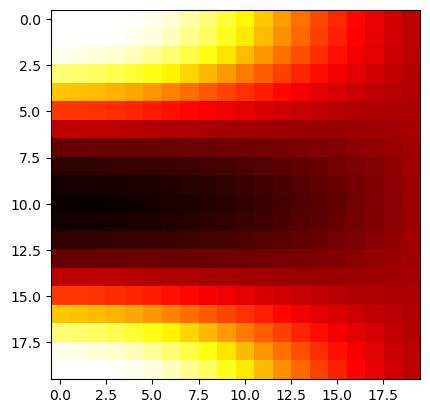

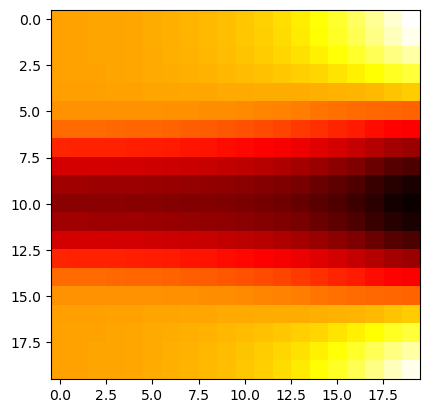

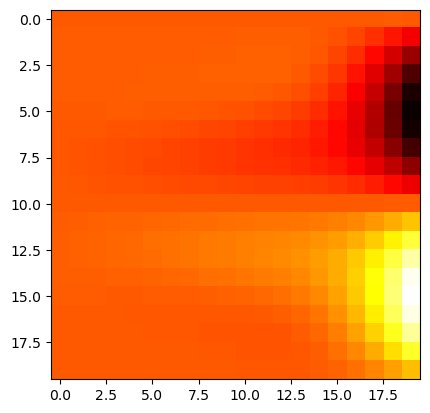

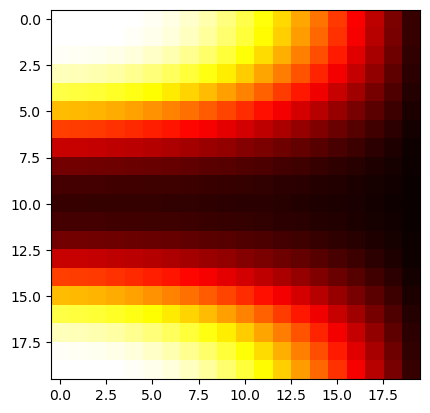

In [11]:
a = 1/2
k = 1/np.sqrt(2)
J = -4/k**4
N = 1
nu = 10 # even
nv = 10
reset = True
#dv = np.log((a+x_min)/(a-x_min))

nx = nv
Xs = np.linspace(0, a, nv+2)[1:-1]
Vs = np.log((a+Xs)/(a-Xs))
#Vs = np.linspace(0, 2, nv + 1)[1:]
Us = np.linspace(0, 2*np.pi, nu + 1)[:-1]
dx = Xs[1]-Xs[0]
du = Us[1] - Us[0]
dv = Vs[1] - Vs[0]

dx_dv = np.zeros((nu, nv))
dx2_dv2 = np.zeros((nu, nv))
for j, v in enumerate(Vs):
    dx_dv[:,j] = a / (1+np.cosh(v))
    dx2_dv2[:,j] = -a * np.sinh(v) / (1 + np.cosh(v))**2

@njit(cache = True)
def d_dx(f, h, n, boundary_left, boundary_right):
    return d(f, h, n, boundary_left, boundary_right, axis = 1)

@njit(cache = True)
def d_dv(f, h, n, boundary_left, boundary_right):
    if n == 0:
        return f
    df_dx = d_dx(f, dx, 1, boundary_left, boundary_right)
    if n == 1:
        return df_dx * dx_dv
    df2_dx2 = d_dx(f, dx, 2, boundary_left, boundary_right)
    return df2_dx2 * dx_dv**2 + df_dx * dx2_dv2

dAs = np.zeros((nu, nv))
for i, u in enumerate(Us):
    for j, v in enumerate(Vs):
        h = a / (np.cosh(v) - np.cos(u))
        dAs[i,j] = h**2 * du * dv
print(np.max(dAs))


radii = a/np.sinh(Vs)
print(radii)

@njit(cache = True)
def dfunc_du(func, n):
    boundary_left = np.ascontiguousarray(func[-1,:])
    boundary_right = np.ascontiguousarray(func[0,:])
    return d_du(func, du, n, boundary_left, boundary_right)

@njit(cache = True)
def dV_du(V, n):
    return dfunc_du(V, n)

@njit(cache = True)
def dFu_du(Fu, n):
    return dfunc_du(Fu, n)

@njit(cache = True)
def dFv_du(Fv, n):
    return dfunc_du(Fv, n)

@njit(cache = True)
def dF_du(Fu, Fv, n):
    return dfunc_du(Fu, n), dfunc_du(Fv, n)

@njit(cache = True)
def dC_du(C, n):
    return dfunc_du(C, n)

@njit(cache = True)
def M(u,v):
    M_00 = -np.sin(u)*np.sinh(v) / (np.cosh(v)-np.cos(u))
    M_01 = (1 - np.cos(u)*np.cosh(v)) / (np.cosh(v)-np.cos(u))
    M_10 = - M_01
    M_11 = M_00
    return 

@njit(cache = True)
def BP2cart(Fu, Fv, u, v):
    M_00 = -np.sin(u)*np.sinh(v) / (np.cosh(v)-np.cos(u))
    M_01 = (1 - np.cos(u)*np.cosh(v)) / (np.cosh(v)-np.cos(u))
    M_10 = - M_01
    M_11 = M_00
    return Fu * M_00 + Fv * M_01, Fu * M_10 + Fv * M_11
    #return np.dot(M(u,v), np.array([Fu, Fv]))

@njit(cache = True)
def cart2BP(Fx, Fy, u, v):
    M_00 = -np.sin(u)*np.sinh(v) / (np.cosh(v)-np.cos(u))
    M_01 = (1 - np.cos(u)*np.cosh(v)) / (np.cosh(v)-np.cos(u))
    M_10 = - M_01
    M_11 = M_00
    MT_00, MT_01, MT_10, MT_11 = M_00, M_10, M_01, M_11
    return Fx * MT_00 + Fy * MT_01, Fx * M_10 + Fy * M_11
    #return np.dot(M(u,v).transpose(), np.array([Fx, Fy]))

@njit(cache = True)
def cart2BPinfinity(Fx, Fy, u):
    M_00 = -np.sin(u)
    M_01 = -np.cos(u)
    M_10 = - M_01
    M_11 = M_00
    MT_00, MT_01, MT_10, MT_11 = M_00, M_10, M_01, M_11
    return Fx * MT_00 + Fy * MT_01, Fx * M_10 + Fy * M_11


@njit(cache = True)
def dV_dv(V, n):
    boundary_left = np.ascontiguousarray(V[:,0])
    boundary_left[0] = -1
    boundary_right = np.full(np.shape(V)[0], np.mean(V[:,-1]))
    return d_dv(V, dv, n, boundary_left, boundary_right)

@njit(parallel = True, cache = True)
def dF_dv(Fu, Fv, n = 1):
    boundary_left_u = np.ascontiguousarray(Fu[:,0])
    boundary_left_u[0] = N / a
    boundary_left_v = np.zeros(nu)

    xs, ys = BP2cart(Fu[:,-1],  Fv[:,-1], Us, Vs[-1])
    avg_x = np.mean(xs)
    avg_y = np.mean(ys)
    #boundary_right_u, boundary_right_v =  cart2BP(avg_x, avg_y, Us, Vs[-1]+dv)
    boundary_right_u, boundary_right_v =  cart2BPinfinity(avg_x, avg_y, Us)
    """
    boundary_right_u = np.zeros(nu)
    boundary_right_v = np.zeros(nu)
    """
    Fu_result = d_dv(Fu, dv, n, boundary_left_u, boundary_right_u)
    Fv_result = d_dv(Fv, dv, n, boundary_left_v, boundary_right_v)
    return Fu_result, Fv_result

@njit(cache = True)
def dC_dv(C, n = 1):
    boundary_left = np.ascontiguousarray(C[:,0])
    boundary_left[0] = np.sqrt(-J)
    boundary_right = np.zeros(np.shape(C)[0])
    return d_dv(C, dv, n, boundary_left, boundary_right)


@njit(parallel = True, cache = True)
def f(V_Fu_Fv_C):
    #atime = time()
    V = np.reshape(V_Fu_Fv_C[0:(nu*nv)], (nu,nv))
    Fu = np.reshape(V_Fu_Fv_C[(nu*nv):2*(nu*nv)], (nu,nv))
    Fv = np.reshape(V_Fu_Fv_C[2*(nu*nv):3*(nu*nv)], (nu,nv))
    C = np.reshape(V_Fu_Fv_C[3*(nu*nv):],(nu,nv))
    eq0_V = np.zeros((nu, nv))
    eq0_Fu = np.zeros((nu, nv))
    eq0_Fv = np.zeros((nu, nv))
    eq0_C = np.zeros((nu, nv))
    V_u = dV_du(V, n = 1)
    V_v = dV_dv(V, n = 1)
    V_uu = dV_du(V, n = 2)
    V_uv = dV_du(V_v, n = 1)
    V_vv = dV_dv(V, n = 2)
    Fu_u, Fv_u = dF_du(Fu, Fv, n = 1)
    Fu_v, Fv_v = dF_dv(Fu, Fv, n = 1)
    Fu_uu, Fv_uu = dF_du(Fu, Fv, n = 2)
    Fu_uv, Fv_uv = dF_du(Fu_v, Fv_v, n = 1)
    Fu_vv, Fv_vv = dF_dv(Fu, Fv, n = 2)
    C_u = dC_du(C, n = 1)
    C_v = dC_dv(C, n = 1)
    C_uu = dC_du(C, n = 2)
    C_uv = dC_du(C_v, n = 1)
    C_vv = dC_dv(C, n = 2)
    #btime = time()
    # define arguments for the lambdified expression from sympy and fill the result array
    args = np.zeros(29)
    for i in prange(nu):
        u = Us[i]
        for j in prange(nv):
            v = Vs[j]
            args = (V[i,j], V_u[i,j], V_v[i,j], V_uu[i,j], V_uv[i,j], V_vv[i,j], Fu[i,j], Fu_u[i,j], Fu_v[i,j], Fu_uu[i,j], Fu_uv[i,j], Fu_vv[i,j], Fv[i,j], Fv_u[i,j], Fv_v[i,j], Fv_uu[i,j], Fv_uv[i,j], Fv_vv[i,j], C[i,j], C_u[i,j], C_v[i,j], C_uu[i,j], C_uv[i,j], C_vv[i,j], u, v, a, J, N)
            eq0_V[i,j] = eq0_V_lambdified(*args)
            eq0_Fu[i,j] = eq0_Fu_lambdified(*args)
            eq0_Fv[i,j] = eq0_Fv_lambdified(*args)
            eq0_C[i,j] = eq0_C_lambdified(*args)
    result = np.append(eq0_V.flatten(), eq0_Fu.flatten())
    result = np.append(result, eq0_Fv.flatten())
    result = np.append(result, eq0_C.flatten())
    #ctime = time()
    #print('b-a', btime - atime)
    #print('c-b', ctime - btime)
    #print(atime, btime, ctime)
    #print('ab', btime - atime)
    #print('bc', ctime - btime)
    return result


@njit(cache = True)
def parta(V_Fu_Fv_C):
    V = np.reshape(V_Fu_Fv_C[0:(nu*nv)], (nu,nv))
    Fu = np.reshape(V_Fu_Fv_C[(nu*nv):2*(nu*nv)], (nu,nv))
    Fv = np.reshape(V_Fu_Fv_C[2*(nu*nv):3*(nu*nv)], (nu,nv))
    C = np.reshape(V_Fu_Fv_C[3*(nu*nv):],(nu,nv))
    """
    V_u = np.zeros((nu,nv))
    V_v = np.zeros((nu,nv))
    V_uu = np.zeros((nu,nv))
    V_uv = np.zeros((nu,nv))
    V_vv = np.zeros((nu,nv))
    Fu_u = np.zeros((nu,nv))
    Fu_v = np.zeros((nu,nv))
    Fu_uu = np.zeros((nu,nv))
    Fu_uv = np.zeros((nu,nv))
    Fu_vv = np.zeros((nu,nv))
    Fv_u = np.zeros((nu,nv))
    Fv_v = np.zeros((nu,nv))
    Fv_uu = np.zeros((nu,nv))
    Fv_uv = np.zeros((nu,nv))
    Fv_vv = np.zeros((nu,nv))
    C_u = np.zeros((nu,nv))
    C_v = np.zeros((nu,nv))
    C_uu = np.zeros((nu,nv))
    C_uv = np.zeros((nu,nv))
    C_vv = np.zeros((nu,nv))
    """
    for idx in range(12):
        if idx == 0:
            V_u = dV_du(V, n = 1)
        elif idx == 1:
            V_v = dV_dv(V, n = 1)
        elif idx == 2:
            V_uu = dV_du(V, n = 2)
        elif idx == 3:
            V_vv = dV_dv(V, n = 2)
        elif idx == 4:
            Fu_u, Fv_u = dF_du(Fu, Fv, n = 1)
        elif idx == 5:
            Fu_v, Fv_v = dF_dv(Fu, Fv, n = 1)
        elif idx == 6:
            Fu_uu, Fv_uu = dF_du(Fu, Fv, n = 2)
        elif idx == 7:
            Fu_vv, Fv_vv = dF_dv(Fu, Fv, n = 2)
        elif idx == 8:
            C_u = dC_du(C, n = 1)
        elif idx == 9:
            C_v = dC_dv(C, n = 1)
        elif idx == 10:
            C_uu = dC_du(C, n = 2)
        elif idx == 11:
            C_vv = dC_dv(C, n = 2)
    for idx in range(3):
        if idx == 0:
            V_uv = dV_du(V_v, n = 1)
        elif idx == 1:
            Fu_uv, Fv_uv = dF_du(Fu_v, Fv_v, n = 1)
        elif idx == 2:
            C_uv = dC_du(C_v, n = 1)
    return V, V_u, V_v, V_uu, V_uv, V_vv, Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv, Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv, C, C_u, C_v, C_uu, C_uv, C_vv


u_2d = np.zeros((nu,nv))
v_2d = np.zeros((nu,nv))
for i in range(nu):
    u_2d[i,:] = Us[i]
for j in range(nv):
    v_2d[:,j] = Vs[j]

@njit(cache = True)
def partbvectorized(derivatives):
    V, V_u, V_v, V_uu, V_uv, V_vv, Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv, Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv, C, C_u, C_v, C_uu, C_uv, C_vv = derivatives
    args = (V, V_u, V_v, V_uu, V_uv, V_vv, Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv, Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv, C, C_u, C_v, C_uu, C_uv, C_vv, u_2d, v_2d, a, J, N)
    eq0_V = eq0_V_lambdified(*args)
    eq0_Fu = eq0_Fu_lambdified(*args)
    eq0_Fv = eq0_Fv_lambdified(*args)
    eq0_C = eq0_C_lambdified(*args)
    result = np.append(eq0_V.flatten(), eq0_Fu.flatten())
    result = np.append(result, eq0_Fv.flatten())
    result = np.append(result, eq0_C.flatten())
    #ctime = time()
    #print('b-a', btime - atime)
    #print('c-b', ctime - btime)
    #print(atime, btime, ctime)
    #print('ab', btime - atime)
    #print('bc', ctime - btime)
    return result


@njit(parallel = True, cache = True)
def partb(derivatives):
    V, V_u, V_v, V_uu, V_uv, V_vv, Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv, Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv, C, C_u, C_v, C_uu, C_uv, C_vv = derivatives
    eq0_V = np.zeros((nu, nv))
    eq0_Fu = np.zeros((nu, nv))
    eq0_Fv = np.zeros((nu, nv))
    eq0_C = np.zeros((nu, nv))
    args = np.zeros(29)
    for i in prange(nu):
        u = Us[i]
        for j in prange(nv):
            v = Vs[j]
            args = (V[i,j], V_u[i,j], V_v[i,j], V_uu[i,j], V_uv[i,j], V_vv[i,j], Fu[i,j], Fu_u[i,j], Fu_v[i,j], Fu_uu[i,j], Fu_uv[i,j], Fu_vv[i,j], Fv[i,j], Fv_u[i,j], Fv_v[i,j], Fv_uu[i,j], Fv_uv[i,j], Fv_vv[i,j], C[i,j], C_u[i,j], C_v[i,j], C_uu[i,j], C_uv[i,j], C_vv[i,j], u, v, a, J, N)
            eq0_V[i,j] = eq0_V_lambdified(*args)
            eq0_Fu[i,j] = eq0_Fu_lambdified(*args)
            eq0_Fv[i,j] = eq0_Fv_lambdified(*args)
            eq0_C[i,j] = eq0_C_lambdified(*args)
    result = np.append(eq0_V.flatten(), eq0_Fu.flatten())
    result = np.append(result, eq0_Fv.flatten())
    result = np.append(result, eq0_C.flatten())
    #ctime = time()
    #print('b-a', btime - atime)
    #print('c-b', ctime - btime)
    #print(atime, btime, ctime)
    #print('ab', btime - atime)
    #print('bc', ctime - btime)
    return result

def g(V_Fu_Fv_C):
    timea = time()
    derivatives = parta(V_Fu_Fv_C)
    timeb = time()
    result = partb(derivatives)
    #result = partbvectorized(derivatives)
    timec = time()
    #print('part a', timeb-timea)
    #print('part b', timec-timeb)
    return result
"""
def g(V_Fu_Fv_C):
    start = time()
    result = f(V_Fu_Fv_C)
    end = time()
    print(start, end)
    return result
"""    


# solve nonlinear problem

if not reset: 
    V0 = V
    Fu0 = Fu
    Fv0 = Fv
    C0 = C
    V0, Fu0, Fv0, C0 == V, Fu, Fv, C
    #V0, Fu0, Fv0, C0 = np.zeros((nu, nv)), np.zeros((nu, nv)), np.zeros((nu, nv)), np.zeros((nu, nv))
    #V0 = interp(V_padded, nu, nv+2)[:,1:-1]
    #Fu0 = interp(Fu_padded, nu, nv+2)[:,1:-1]
    #Fv0 = interp(Fv_padded, nu, nv+2)[:,1:-1]
    #C0 = interp(C_padded, nu, nv+2)[:,1:-1]        
    plt.imshow(V0, interpolation='nearest')
    plt.show()
    plt.imshow(Fu0, interpolation='nearest')
    plt.show()
    plt.imshow(Fv0, interpolation='nearest')
    plt.show()
    plt.imshow(C0, interpolation='nearest')
    plt.show()
    x0 = np.concatenate([V0.flatten(), Fu0.flatten(), Fv0.flatten(), C0.flatten()])
else:
    x0 = np.zeros(4*nu*nv, dtype = float)
    x0[0:(nu*nv)] = -1
    Fu0 = np.zeros((nu,nv))
    for j, v in enumerate(Vs):
        Fu0[:, j] = N * np.cosh(v) / a
    x0[(nu*nv):2*(nu*nv)] = Fu0.flatten()
    x0[3*(nu*nv):] = np.sqrt(-J)

def f_reduced(V_C):
    V, C = V_C[0:nu*nv], V_C[nu*nv:], 
    Fu, Fv = np.zeros(nu*nv), np.zeros(nu*nv)
    V_Fu_Fv_C = np.concatenate([V,Fu,Fv,C])
    result =  f(V_Fu_Fv_C)
    eq0_V = result[0:nu*nv]
    eq0_C = result[-nu*nv:]
    return np.concatenate([eq0_V, eq0_C])

if N:
    start = time()
    solution, infodict, ier, mesg = fsolve(g, x0, full_output = True)
    end = time()
    print(mesg)
    print(end-start)

    V = np.reshape(solution[0:(nu*nv)], (nu,nv))
    Fu = np.reshape(solution[(nu*nv):2*(nu*nv)], (nu,nv))
    Fv = np.reshape(solution[2*(nu*nv):3*(nu*nv)], (nu,nv))
    C = np.reshape(solution[3*(nu*nv):], (nu,nv))
else:
    print('Electrostatic')
    x0_reduced = np.zeros(2*nu*nv)
    x0_reduced[0:nu*nv] = x0[0:nu*nv]
    x0_reduced[-nu*nv:] = x0[-nu*nv:]
    start = time()
    solution, infodict, ier, mesg = fsolve(f_reduced, x0_reduced, full_output = True)
    end = time()
    print(mesg)
    print(end-start)

    V = np.reshape(solution[0:(nu*nv)], (nu,nv))
    Fu = np.zeros((nu,nv))
    Fv = np.zeros((nu,nv))
    C = np.reshape(solution[-(nu*nv):], (nu,nv))


plt.imshow(V, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(Fu, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(Fv, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(C, cmap='hot', interpolation='nearest')
plt.show()

Us_padded = Us
Xs_padded = np.linspace(0, a, nx+2)
V_padded, Fu_padded, Fv_padded, C_padded = np.zeros((nu, nx+2)), np.zeros((nu, nx+2)), np.zeros((nu, nx+2)), np.zeros((nu, nx+2))
V_padded[:, 1:-1], Fu_padded[:,1:-1], Fv_padded[:,1:-1], C_padded[:,1:-1] = V, Fu, Fv, C
V_padded[:,0] = V[:,0]
V_padded[:,-1] =  np.mean(V[:,-1])
Fu_padded[:,0] = Fu[:,0]
Fv_padded[:,0] = 0
xs, ys = BP2cart(Fu[:,-1],  Fv[:,-1], Us, Vs[-1])
avg_x = np.mean(xs)
avg_y = np.mean(ys)
Fu_padded[:,-1], Fv_padded[:,-1] =  cart2BPinfinity(avg_x, avg_y, Us)
C_padded[:,0] = C[:,0]
C_padded[:,-1] = 0

def interp(arr, new_nx, new_ny):
    old_nx = arr.shape[0]
    old_ny = arr.shape[1]
    old_xs = np.linspace(0, 1, old_nx)
    old_ys = np.linspace(0, 1, old_ny)
    new_xs = np.linspace(0, 1, new_nx)
    new_ys = np.linspace(0, 1, new_ny)
    interp_x = np.zeros((new_nx, old_ny))
    for j in range(old_ny):
        interp_x[:,j] = np.interp(new_xs, old_xs, arr[:,j])
    interp_xy = np.zeros((new_nx, new_ny))
    for i in range(new_nx):
        interp_xy[i,:] = np.interp(new_ys, old_ys, interp_x[i,:])
    return interp_xy


3.761099996779649e-06
4.613294994669745e-08


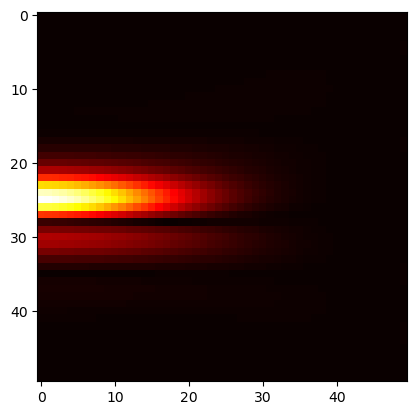

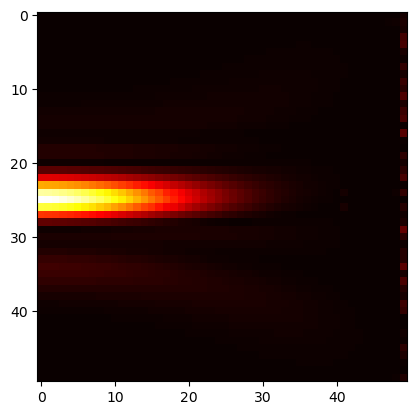

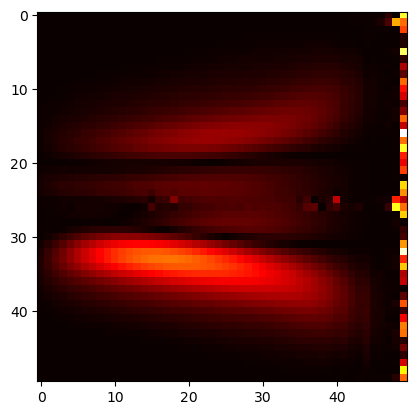

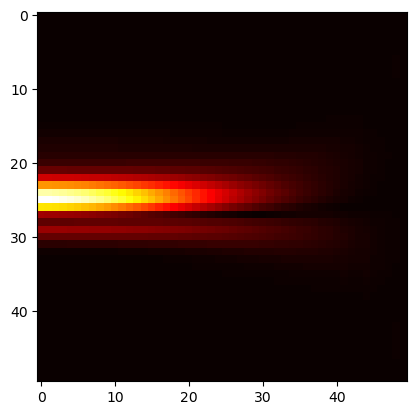

In [26]:
error = infodict['fvec']
print(np.max(np.abs(error)))
print(np.mean(np.abs(error)))
V_error = np.reshape(error[0:(nu*nv)], (nu,nv))
Fu_error = np.reshape(error[(nu*nv):2*(nu*nv)], (nu,nv))
Fv_error = np.reshape(error[2*(nu*nv):3*(nu*nv)], (nu,nv))
C_error = np.reshape(error[3*(nu*nv):], (nu,nv))
plt.imshow(np.abs(V_error), cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(np.abs(Fu_error), cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(np.abs(Fv_error), cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(np.abs(C_error), cmap='hot', interpolation='nearest')
plt.show()


0


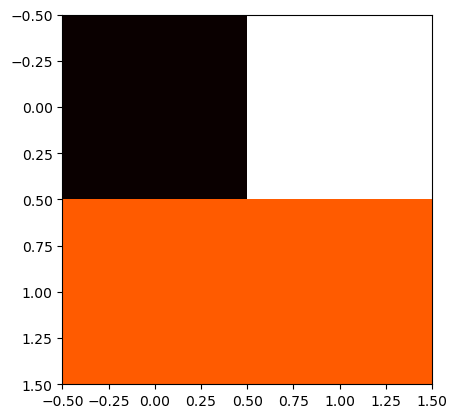

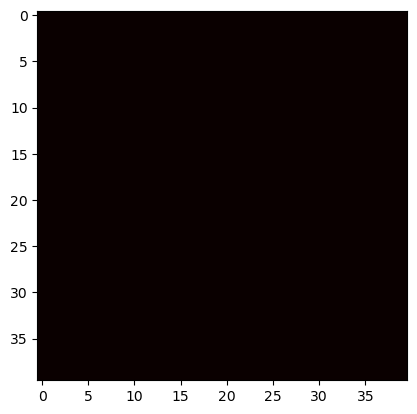

In [18]:
print(np.sum(C<0))
test = np.zeros((2,2))
test[0,0] = -1
test[0,1] = 1
plt.imshow(test, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(C<0, cmap='hot', interpolation='nearest')
plt.show()


V


200it [00:54,  3.67it/s]


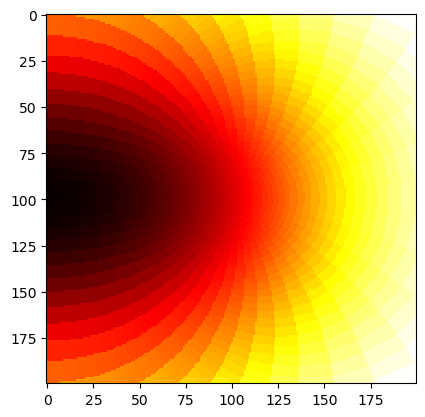

F_u


200it [00:54,  3.68it/s]


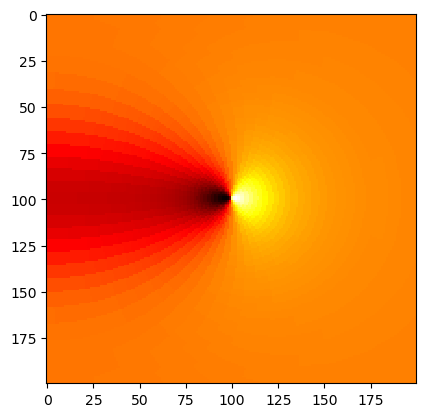

F_v


200it [00:54,  3.66it/s]


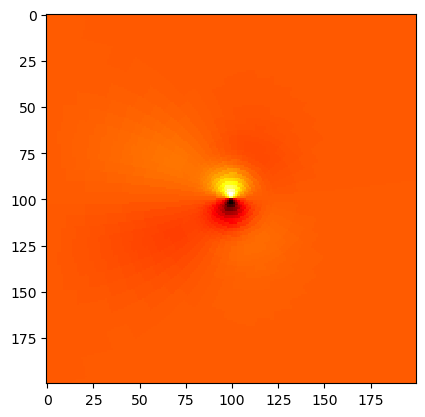

C


200it [00:54,  3.67it/s]


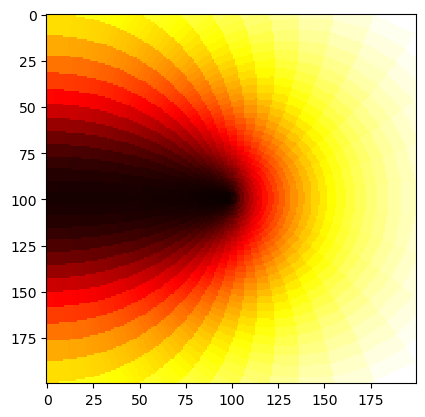

In [27]:
from tqdm import tqdm
V_points = []
Fu_points = []
Fv_points = []
C_points = []
for i, u in enumerate(Us):
    for j, v in enumerate(Vs):
        h = a / (np.cosh(v) - np.cos(u))
        x = h * np.sinh(v)
        y = h * np.sin(u)
        V_points.append((x, y, V[i,j]))
        Fu_points.append((x, y, Fu[i,j]))
        Fv_points.append((x, y, Fv[i,j]))
        C_points.append((x, y, C[i,j]))

        
def plot(field):
    field_points = []
    for i, u in enumerate(Us):
        for j, v in enumerate(Vs):
            h = a / (np.cosh(v) - np.cos(u))
            x = h * np.sinh(v)
            y = h * np.sin(u)
            field_points.append((x, y, field[i,j]))
    
    min_x = min(p[0] for p in field_points)
    max_x = max(p[0] for p in field_points)
    min_y = min(p[1] for p in field_points)
    max_y = max(p[1] for p in field_points)
    min_z = min(p[2] for p in field_points)
    max_z = max(p[2] for p in field_points)
    max_x = 2*a
    min_x = 0
    max_y = a
    min_y = -a
    nx = 200
    ny = 200
    X = np.linspace(min_x, max_x, nx)
    Y = np.linspace(min_y, max_y, ny)
    Z = np.zeros((ny, nx))
    def dist(x1, y1, x2, y2):
        return np.sqrt((x1-x2)**2 + (y1-y2)**2)
    for i, x in tqdm(enumerate(X)):
        for j, y in enumerate(Y):
            closest_dist = np.sqrt((max_x - min_x)**2 + (max_y - min_y)**2)
            for p in field_points:
                px, py, pz = p
                d = dist(x, y, px, py)
                if d < closest_dist:
                    Z[j, i] = pz
                    closest_dist = d
    plt.imshow(Z, cmap='hot', interpolation='nearest')
    plt.show()

print('V')
plot(V)
print('F_u')
plot(Fu)
print('F_v')
plot(Fv)
print('C')
plot(C)

200it [00:54,  3.68it/s]


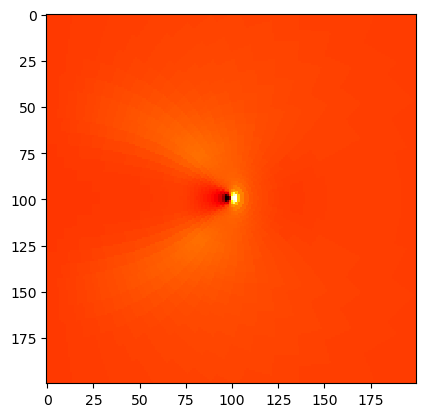

2211
289


In [28]:
Fu_u, Fv_u = dF_du(Fu, Fv, n = 1)
Fu_v, Fv_v = dF_dv(Fu, Fv, n = 1)
Fu_uu, Fv_uu = dF_du(Fu, Fv, n = 2)
Fu_uv, Fv_uv = dF_du(Fu_v, Fv_v, n = 1)
Fu_vv, Fv_vv = dF_dv(Fu, Fv, n = 2)
B = np.zeros((nu,nv))
for i, u in enumerate(Us):
    for j, v in enumerate(Vs):
        args = [Fu[i,j], Fu_u[i,j], Fu_v[i,j], Fu_uu[i,j], Fu_uv[i,j], Fu_vv[i,j]]
        args.extend([Fv[i,j], Fv_u[i,j], Fv_v[i,j], Fv_uu[i,j], Fv_uv[i,j], Fv_vv[i,j]])
        args.extend([u, v, a, N])
        B[i,j] = B_lambdified(*args)
plot(B)
print(np.sum(B>0))
print(np.sum(B<0))

20it [00:00, 206.79it/s]
20it [00:00, 77528.72it/s]


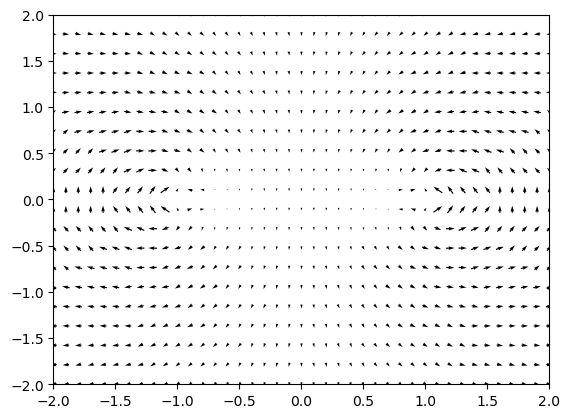

20it [00:00, 221.56it/s]
20it [00:00, 89240.51it/s]


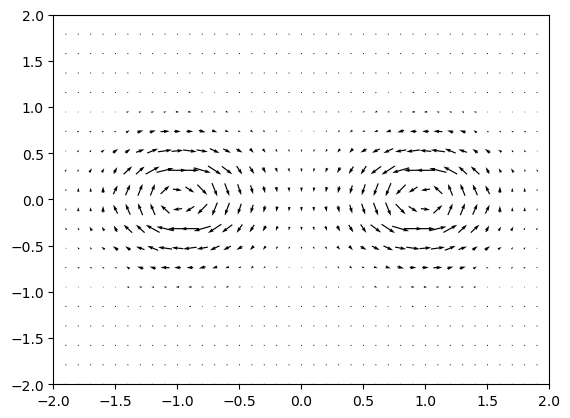

In [23]:
def plot_vector(field_u, field_v):
    nx = 20
    ny = 20
    norms = np.sqrt(field_u**2 + field_v**2)
    max_norm = max(norms.flatten())
    min_x = 0
    max_x = 2*a
    max_y = 2*a
    min_y = -max_y
    dx = max_x/nx
    dy = max_y/ny
    field_u = min(dx, dy) * field_u / max_norm
    field_v = min(dx, dy) * field_v / max_norm
    field_points = []
    for i, u in enumerate(Us):
        for j, v in enumerate(Vs):
            h = a / (np.cosh(v) - np.cos(u))
            x = h * np.sinh(v)
            y = h * np.sin(u)
            fpx, fpy = BP2cart(field_u[i,j], field_v[i,j], u, v)
            field_points.append((x,y,fpx,fpy))    
    #min_x = min(p[0] for p in field_points)
    #max_x = max(p[0] for p in field_points)
    #min_y = min(p[1] for p in field_points)
    #max_y = max(p[1] for p in field_points)
    #min_z = min(p[2] for p in field_points)
    #max_z = max(p[2] for p in field_points)
    XX = np.linspace(max_x/nx, max_x, nx)
    YY = np.linspace(min_y, max_y, ny)
    UU = np.zeros((nx, ny))
    VV = np.zeros((nx, ny))
    def dist(x1, y1, x2, y2):
        return np.sqrt((x1-x2)**2 + (y1-y2)**2)
    for i, x in tqdm(enumerate(XX)):
        for j, y in enumerate(YY):
            closest_dist = np.sqrt((max_x - min_x)**2 + (max_y - min_y)**2)
            for p in field_points:
                px, py, fpx, fpy = p
                d = dist(x, y, px, py)
                if d < closest_dist:
                    UU[i,j] = fpx
                    VV[i,j] = fpy
                    closest_dist = d
    XXX = []
    YYY = []
    UUU = []
    VVV = []
    for j, y in enumerate(YY):
        XXX.append(0)
        YYY.append(y)
        UUU.append(0)
        VVV.append(VV[0,j])
    for i, x in tqdm(enumerate(XX)):
        for j, y in enumerate(YY):
            XXX.append(x)
            YYY.append(y)
            UUU.append(UU[i,j])
            VVV.append(VV[i,j])
            XXX.append(-x)
            YYY.append(y)
            UUU.append(-UU[i,j])
            VVV.append(VV[i,j])

    fig1, ax1 = plt.subplots()
    Q = ax1.quiver(XXX, YYY, UUU, VVV, units='width', angles='xy', scale_units='xy', scale=2/3, pivot = 'middle')
    plt.xlim(-max_x, max_x)
    plt.ylim(min_y, max_y)
    plt.savefig('test.pdf')
    plt.show()

current_u = np.zeros((nu, nv))
current_v = np.zeros((nu, nv))
norm = np.zeros((nu,nv))
for i, u in enumerate(Us):
    for j, v in enumerate(Vs):
        current_u[i,j] = -(Fu[i,j] - N * np.cosh(v)/a) * C[i,j]**2
        current_v[i,j] = -Fv[i,j] * C[i,j]**2
        norm[i,j] = np.sqrt(current_u[i,j]**2 + current_v[i,j]**2)
#plot(norm)
plot_vector(Fu, Fv)
plot_vector(current_u, current_v)

In [ ]:
plt.plot(r[0:100],(dv_dr(V)**2)[0:100])
plt.title('electric')
plt.show()
print(np.sum(r*dv_dr(V)**2))
plt.plot((dl_dr(L)/r)**2)
plt.title('magnetic')
plt.show()
print(np.sum(r*(dl_dr(L)/r)**2))
plt.plot(dc_dr(C)**2)
plt.title('elastic')
plt.show()
print(np.sum(r*dc_dr(C)**2))
plt.plot((V**2*C**2)-j)
plt.title('V2C2')
plt.show()
print(np.sum(r*((V**2*C**2)-j)))
plt.plot(((L/r)**2*C**2))
plt.title('A2C2')
plt.show()
print(np.sum(r*((L/r)**2*C**2)))
plt.plot(C**2-j)
plt.title('C2')
plt.show()
print(np.sum(r*(C**2-j)))


dtau = dv_dr(V)**2 + (dl_dr(L)/r)**2 + dc_dr(C)**2 + (V**2 + (L/r)**2 + 1)*C**2 - 2*j
plt.plot(dtau)
plt.show()
print('total',np.sum(dtau*r))

NameError: name 'r' is not defined

In [ ]:
k = 1000
j = 4/k**4
w = 1

nr = 4000
max_r = k**2/2 * 400

s = np.linspace(0,1, nr+2)[1:-1]
ds = s[1]-s[0]
r = s/(1-s)
R = max_r / r[-1]
r = r * R
print(R, r[0])

ds_dr = R/(r+R)**2
d2s_dr2 = -2*R/(r+R)**3

dr = ds / ds_dr

def dv_ds(v, n = 1):
    return d(v, ds, n, boundaries = [[v[0]],[-1]])

def dl_ds(l, n = 1):
    return d(l, ds, n, boundaries = [[-w],[0]])

def dc_ds(c, n = 1):
    return d(c, ds, n, boundaries = [[0],[np.sqrt(j)]])

def df_dr(df_ds, n = 1):
    if n == 0:
        return (lambda f: f)
    elif n == 1:
        return (lambda f: df_ds(f, n = 1) * ds_dr)
    elif n == 2:
        return (lambda f: (df_ds(f, n = 2) * ds_dr**2 + df_ds(f, n = 1) * d2s_dr2))
    else:
        raise Exception('Invalid degree')

    
def dv_dr(v, n = 1):
    return df_dr(dv_ds, n)(v)

def dl_dr(l, n = 1):
    return df_dr(dl_ds, n)(l)

def dc_dr(c, n = 1):
    return df_dr(dc_ds, n)(c)

def f(v_l_c):
    v = v_l_c[0:nr]
    l = v_l_c[nr:2*nr]
    c = v_l_c[2*nr:]
    result = np.zeros(3*nr) # initialize result
    dvs = np.zeros((nr,3))
    dls = np.zeros((nr,3))
    dcs = np.zeros((nr,3))
    for i in range(3):
        dvs[:,i] = dv_dr(v, n = i)
        dls[:,i] = dl_dr(l, n = i)
        dcs[:,i] = dc_dr(c, n = i)
    # define arguments for the lambdified expression from sympy and fill the result array
    args = np.zeros(11)
    for i in range(nr):
        args[0:3] = dvs[i,:]
        args[3:6] = dls[i,:]
        args[6:9] = dcs[i,:]
        args[9] = r[i]
        args[10] = j
        result[i] = eq0_v_lambdified(*args)
        result[i+nr] = eq0_l_lambdified(*args)
        result[i+2*nr] = eq0_c_lambdified(*args)
    return result
# solve nonlinear problem
x0 = np.zeros(3*nr)
x0[0:nr] = -np.ones(nr)
x0[2*nr:] = np.sqrt(j)*np.ones(nr)
start = time()
solution, infodict, ier, mesg = fsolve(f, x0, full_output = True, xtol = 1e-12)
end = time()
print(mesg)
print(end-start)

V = solution[0:nr]
L = solution[nr:2*nr]
C = solution[2*nr:]

plt.scatter(r, V)
plt.show()
plt.scatter(r, L)
plt.show()
plt.scatter(r, C)
plt.show()

In [ ]:



plt.scatter(r,(dv_dr(V)**2))
plt.title('electric')
plt.show()
print(np.sum(dv_dr(V)**2*r*dr*(k**4/8)))
plt.scatter(r, (dl_dr(L)/r)**2)
plt.title('magnetic')
plt.show()
print(np.sum((dl_dr(L)/r)**2*r*dr*(k**4/8)))
plt.scatter(r, 2*((V*C)**2 - j))
plt.title('hydrodynamic')
plt.show()
print(np.sum((2*((V*C)**2-j))*r*dr*(k**4/8)))

dtau = dv_dr(V)**2 + (dl_dr(L)/r)**2 + 2*((V*C)**2 - j)
plt.scatter(r, dtau)
plt.show()
print('total', np.sum(dtau*r*dr)*k**4/8)

In [ ]:
max_idx = 2000
plt.plot(r[0:max_idx], (r*dr*((V*C)**2-j))[0:max_idx])
np.sum(r*dr*((V*C)**2-j))

In [ ]:
max_idx=3990

plt.scatter(r[0:max_idx], V[0:max_idx])
plt.show()
plt.scatter(r[0:max_idx], L[0:max_idx])
plt.show()
plt.scatter(r[0:max_idx], C[0:max_idx])
plt.show()

In [ ]:
print(r[0])


In [ ]:
print(r[0])
print(k/2)

In [ ]:
from scipy.special import kn

k = 1
w = 1

j = 4/k**4

nr = 1000
max_r = k/2 * 100

r = np.linspace(0,max_r, nr+1)[1:]
dr = r[1]-r[0]

def bessel(l):
    rm1 = len(l)*dr
    const = l[-1] / (rm1*kn(1,np.sqrt(j)*rm1))
    return (lambda R: const*R*kn(1,np.sqrt(j)*R))

def dv_dr(v, n = 1):
    return d(v, dr, n, boundaries = [[v[1]],[-1]])

def dl_dr(l, n = 1):
    return d(l, dr, n, boundaries = [[-w],[bessel(l)((len(l)+1)*dr)]])

def dc_dr(c, n = 1):
    return d(c, dr, n, boundaries = [[0],[np.sqrt(j)]])

def f(v_l_c):
    v = v_l_c[0:nr]
    l = v_l_c[nr:2*nr]
    c = v_l_c[2*nr:]
    result = np.zeros(3*nr) # initialize result
    dvs = np.zeros((nr,3))
    dls = np.zeros((nr,3))
    dcs = np.zeros((nr,3))
    for i in range(3):
        dvs[:,i] = dv_dr(v, n = i)
        dls[:,i] = dl_dr(l, n = i)
        dcs[:,i] = dc_dr(c, n = i)
    # define arguments for the lambdified expression from sympy and fill the result array
    args = np.zeros(11)
    for i in range(nr):
        args[0:3] = dvs[i,:]
        args[3:6] = dls[i,:]
        args[6:9] = dcs[i,:]
        args[9] = r[i]
        args[10] = j
        result[i] = eq0_v_lambdified(*args)
        result[i+nr] = eq0_l_lambdified(*args)
        result[i+2*nr] = eq0_c_lambdified(*args)
    return result
# solve nonlinear problem
x0 = np.zeros(3*nr)
x0[0:nr] = -np.ones(nr)
x0[2*nr:] = np.sqrt(j)*np.ones(nr)
start = time()
solution, infodict, ier, mesg = fsolve(f, x0, full_output = True, xtol = 1e-10)
end = time()
print(mesg)
print(end-start)

V = solution[0:nr]
L = solution[nr:2*nr]
C = solution[2*nr:]

plt.plot(r, V)
plt.show()
plt.plot(r, L)
plt.show()
plt.plot(r, C)
plt.show()

In [ ]:
from tqdm import tqdm

# extend solutions

max_r = k**2/2 * 100
mult = int(max_r / r[-1])
r_ext = np.zeros(mult * len(r))
V_ext = np.zeros(mult*len(r))
L_ext = np.zeros(mult*len(r))
C_ext = np.zeros(mult*len(r))
for i in tqdm(range(len(r_ext))):
    r_ext[i] = r[0] + i * dr
    try:
        V_ext[i] = V[i]
        L_ext[i] = L[i]
        C_ext[i] = C[i]
    except:
        V_ext[i] = -1
        L_ext[i] = bessel(L)(r_ext[i])
        C_ext[i] = np.sqrt(j)
        
plt.plot(r_ext, V_ext)
plt.show()
plt.plot(r_ext, L_ext)
plt.show()
plt.plot(r_ext, C_ext)
plt.show()

In [ ]:
electric = dv_dr(V_ext)**2
magnetic = (dl_dr(L_ext)/r_ext)**2
hydrodynamic = 2*((V_ext*C_ext)**2-j)
total = electric + magnetic + hydrodynamic

plt.scatter(r_ext, r_ext*electric)
plt.title('electric')
plt.show()
print(np.sum(electric*r_ext*dr * k**4/8))

plt.scatter(r_ext, r_ext*magnetic)
plt.title('magnetic')
plt.show()
print(np.sum(magnetic*r_ext*dr * k**4/8))

plt.scatter(r_ext, r_ext*hydrodynamic)
plt.title('hydrodynamic')
plt.show()
print(np.sum(hydrodynamic*r_ext*dr * k**4/8))

plt.scatter(r_ext, r_ext*total*dr * k**4/8)
plt.title('total')
plt.show()
print(np.sum(total*r_ext*dr * k**4/8))

In [ ]:
plt.plot(L_ext[0:50000])

In [ ]:
max_idx2 = 100
max_idx = max_idx2 * 2
#max_idx = -1
plt.plot(R2[0:max_idx2], (hydro2*R2*R2[0]*k**4/8)[0:max_idx2])
plt.plot(r_ext[0:max_idx], (hydrodynamic*2*r_ext*r_ext[0]*k**4/8)[0:max_idx])


In [ ]:
R2 = r_ext
V2, L2, C2 = V_ext, L_ext, C_ext
electric2, magnetic2, hydro2, total2 = electric, magnetic, hydrodynamic, total


In [ ]:
#plt.plot(R2[0:50], hydro2[0:50])
#plt.plot(r_ext[0:100], hydrodynamic[0:100])
y = [(hydrodynamic*r_ext*2*r_ext[0])[2*i]* k**4/8 for i in range(500)] - (hydro2*R2*R2[0]* k**4/8)[0:500]
plt.plot(y)
print(np.sum(y))

print(np.sum(hydrodynamic*r_ext*r_ext[0]))
print(np.sum(hydro2*R2*R2[0]))

In [ ]:
plt.plot(R2[0:50],electric2[0:50])
plt.plot(r_ext[0:100], electric[0:100])

In [ ]:
#plt.plot(infodict['fvec'][0:nr])
#plt.plot(infodict['fvec'][nr:2*nr])
plt.plot(infodict['fvec'][2*nr:])

In [ ]:
from scipy.special import kn
from matplotlib import pyplot as plt
from time import time
import numpy as np
from scipy.optimize import fsolve

class Vortex:
    def __init__(self, w, k, nr = 2500, max_r = None):
        if max_r is None:
            max_r = k/2 * 200
        self.w = w
        self.k = k
        self.nr = nr
        self.max_r = max_r
        self.j = 4/k**4
        self.r = np.linspace(0,self.max_r, self.nr+1)[1:]
        self.dr = self.r[1]-self.r[0]
        print(len(self.r)*self.dr, self.r[-1])

    def bessel(self, l):
        rm1 = len(l)*self.dr
        const = l[-1] / (rm1*kn(1,np.sqrt(self.j)*rm1))
        return (lambda R: const*R*kn(1,np.sqrt(j)*R))

    def dv_dr(self, v, n = 1):
        return d(v, self.dr, n, boundaries = [[v[1]],[-1]])

    def dl_dr(self, l, n = 1):
        return d(l, self.dr, n, boundaries = [[-self.w],[self.bessel(l)((len(l)+1)*self.dr)]])

    def dc_dr(self, c, n = 1):
        return d(c, self.dr, n, boundaries = [[0],[np.sqrt(self.j)]])

    def solve(self, x0 = None, xtol = 1e-12):
        def f(v_l_c):
            v = v_l_c[0:self.nr]
            l = v_l_c[self.nr:2*self.nr]
            c = v_l_c[2*self.nr:]
            result = np.zeros(3*self.nr) # initialize result
            dvs = np.zeros((self.nr,3))
            dls = np.zeros((self.nr,3))
            dcs = np.zeros((self.nr,3))
            for i in range(3):
                dvs[:,i] = self.dv_dr(v, n = i)
                dls[:,i] = self.dl_dr(l, n = i)
                dcs[:,i] = self.dc_dr(c, n = i)
            # define arguments for the lambdified expression from sympy and fill the result array
            args = np.zeros(11)
            for i in range(self.nr):
                args[0:3] = dvs[i,:]
                args[3:6] = dls[i,:]
                args[6:9] = dcs[i,:]
                args[9] = self.r[i]
                args[10] = self.j
                result[i] = eq0_v_lambdified(*args)
                result[i+self.nr] = eq0_l_lambdified(*args)
                result[i+2*self.nr] = eq0_c_lambdified(*args)
            return result
        # solve nonlinear problem
        if x0 is None:
            x0 = np.zeros(3*self.nr)
            x0[0:self.nr] = -np.ones(self.nr)
            x0[2*self.nr:] = np.sqrt(self.j)*np.ones(self.nr)
        start = time()
        self.solution, self.infodict, self.ier, self.mesg = fsolve(f, x0, full_output = True, xtol = xtol)
        end = time()
        self.time = end - start
        self.v = self.solution[0:self.nr]
        self.l = self.solution[self.nr:2*self.nr]
        self.c = self.solution[2*self.nr:]
        
    def extend(self, max_R = None):
        if max_R is None:
            self.max_R = self.k**2/2 * 100
        self.nR = int(self.max_R / self.dr)
        self.R = np.zeros(self.nR)
        self.V = np.zeros(self.nR)
        self.L = np.zeros(self.nR)
        self.C = np.zeros(self.nR)
        for i in range(self.nR):
            self.R[i] = self.r[0] + i*self.dr
            try:
                self.V[i] = self.v[i]
                self.L[i] = self.l[i]
                self.C[i] = self.c[i]
            except:
                self.V[i] = -1
                self.L[i] = self.bessel(self.l)(self.R[i])
                self.C[i] = np.sqrt(self.j)
        
    def integrate(self, f):
        return np.sum(self.R * self.dr * f)
    
    def energies(self):
        self.E = self.dv_dr(self.V)**2
        self.M = (self.dl_dr(self.L)/self.R)**2
        self.H = 2*((self.V*self.C)**2)
        self.B = 2*j
        self.T = self.E + self.M + self.H
        self.D = self.T - self.B
        
        self.E_int = self.integrate(self.E)
        self.M_int = self.integrate(self.M)
        self.H_int = self.integrate(self.H)
        self.B_int = self.integrate(self.B)
        self.T_int = self.integrate(self.T)
        self.D_int = self.integrate(self.D)

In [ ]:
ks = np.linspace(100, 1000, 10)
vortices = []
D_ints = []
for i, k in enumerate(ks):
    v = Vortex(1, k, 1000)
    v.solve()
    v.extend()
    v.energies()
    vortices.append(v)
    D_ints.append(v.D_int)
    print(v.mesg)
    print(D_ints[-1])
    plt.plot(v.V)
    plt.show()
    plt.plot(v.L)
    plt.show()
    plt.plot(v.C)
    plt.show()
plt.plot(ks, D_ints)
plt.show()

In [ ]:
v = vortices[-1]
plt.plot(v.L[0:2000])

In [ ]:
plt.plot(v.L[1000:])
plt.show()
plt.plot(v.C[0:1500])
plt.show()
print(v.L[2000])
print(v.C[10])

In [ ]:
v = Vortex(1, 1000, 1000)
v.solve()

In [ ]:
v.extend()
v.energies()

In [ ]:
plt.plot(v.L[0:5000])

In [ ]:
plt.plot(v.infodict['fvec'][0:v.nr])
plt.show()
plt.plot(v.infodict['fvec'][v.nr:2*v.nr])
plt.show()
plt.plot(v.infodict['fvec'][2*v.nr:])
plt.show()

In [ ]:
#plt.plot(v.r)
#plt.plot(v.R)
plt.plot(v.L[0:2000])
#plt.plot(v.bessel(v.l)(v.r))

In [ ]:
print(v.L>0)

In [ ]:
print(v.D_int)

In [ ]:
plt.plot(v.R[0:100]*(v.H-v.B)[0:100])
print(v.H_int)

In [ ]:

k = 10000
w = 1

j = 4/k**4

nr = 1000
max_r = k * 20
r = np.linspace(0,max_r, nr+1)[1:]
dr = r[1]-r[0]

def dv_dr(v, n = 1):
    return d(v, dr, n, boundaries = [[v[0]],[-1]])

def dl_dr(l, n = 1):
    return d(l, dr, n, boundaries = [[-w],[0]])

def dc_dr(c, n = 1):
    return d(c, dr, n, boundaries = [[0],[np.sqrt(j)]])

def f(v_l_c):
    v = v_l_c[0:nr]
    l = v_l_c[nr:2*nr]
    c = v_l_c[2*nr:]
    result = np.zeros(3*nr) # initialize result
    dvs = np.zeros((nr,3))
    dls = np.zeros((nr,3))
    dcs = np.zeros((nr,3))
    for i in range(3):
        dvs[:,i] = dv_dr(v, n = i)
        dls[:,i] = dl_dr(l, n = i)
        dcs[:,i] = dc_dr(c, n = i)
    # define arguments for the lambdified expression from sympy and fill the result array
    args = np.zeros(11)
    for i in range(nr):
        args[0:3] = dvs[i,:]
        args[3:6] = dls[i,:]
        args[6:9] = dcs[i,:]
        args[9] = r[i]
        args[10] = j
        result[i] = eq0_v_lambdified(*args)
        result[i+nr] = eq0_l_lambdified(*args)
        result[i+2*nr] = eq0_c_lambdified(*args)
    return result
# solve nonlinear problem
x0 = np.zeros(3*nr)
x0[0:nr] = -np.ones(nr)
x0[2*nr:] = np.sqrt(j)*np.ones(nr)
start = time()
solution, infodict, ier, mesg = fsolve(f, x0, full_output = True, xtol = 1e-10)
end = time()
print(mesg)
print(end-start)

V = solution[0:nr]
L = solution[nr:2*nr]
C = solution[2*nr:]

plt.plot(r, V)
plt.show()
plt.plot(r, L)
plt.show()
plt.plot(r, C)
plt.show()

dtau = dv_dr(V)**2 / 2 + (dl_dr(L)/r)**2 / 2 + V**2 * C** 2 - j
plt.plot(r, dtau)
plt.show()
print(np.sum(dtau*r))

In [ ]:
print(V>-1)

In [ ]:
dtau = dv_dr(V)**2 / 2 + (dl_dr(L)/r)**2 / 2 + V**2 * C** 2 - j
plt.plot(r, dtau)
plt.show()
print(np.sum(dtau*r))

In [ ]:
plt.plot(L[0:10])